In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


In [2]:
# pip install tensorflow_decision_forests

In [3]:
import tensorflow as tf
#import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from umap import UMAP

In [4]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [6]:
df.isnull().sum().sort_values(ascending=False)

id        0
f_16      0
f_30      0
f_29      0
f_28      0
f_27      0
f_26      0
f_25      0
f_24      0
f_23      0
f_22      0
f_21      0
f_20      0
f_19      0
f_18      0
f_17      0
f_15      0
f_00      0
f_14      0
f_13      0
f_12      0
f_11      0
f_10      0
f_09      0
f_08      0
f_07      0
f_06      0
f_05      0
f_04      0
f_03      0
f_02      0
f_01      0
target    0
dtype: int64

In [7]:
df.columns

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')

## Exploratory analysis on the data

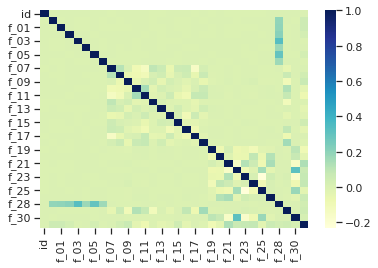

In [8]:
heatmap = sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

## Explore the data distribution of all numerical features

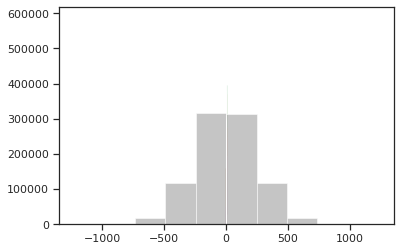

In [9]:
columns = ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_28', 'f_29', 'f_30']
for col in columns:
    plt.hist(df[col], alpha=0.5)

In [10]:
df_numerical = df.drop(['id','f_27','target'], axis = 1)
y = df['target']
df_numerical.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702,0,2
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798,0,1


In [11]:
def convert_PCA(features):
    X = StandardScaler().fit_transform(features)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    
    return principalComponents
pca = convert_PCA(df_numerical)
pca_df = pd.DataFrame(data = pca
                 , columns = ['principal component 1', 'principal component 2'])

In [12]:
pca_df['target'] = y

In [13]:
# def convert_UMAP(features):
#     embedded_X = TSNE(n_components=2, learning_rate=50)
#     tsne_features = embedded_X.fit_transform(features)
    
#     return tsne_features
# tsne = convert_TSNE(df_numerical)
# pca_df['tsne-2d-one'] = tsne[:,0]
# pca_df['tsne-2d-two'] = tsne[:,1] 

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

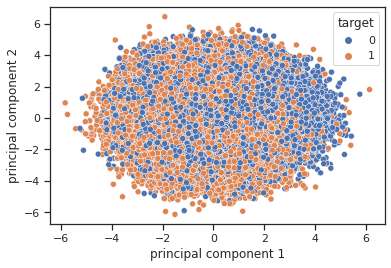

In [14]:
sns.scatterplot(data=pca_df, x='principal component 1', y= 'principal component 2', hue="target", palette="deep")

In [15]:
# reducer = UMAP(n_neighbors=100, n_components=2, n_epochs=1000, 
#                 min_dist=0.5, local_connectivity=2, random_state=42,
#               )
# X_reduced = reducer.fit_transform(df_numerical, y)
# arr_concat=np.concatenate((X_reduced, y_copy.values.reshape(y.shape[0],1)), axis=1)
#     # Create a Pandas dataframe using the above array
# df_umap=pd.DataFrame(arr_concat, columns=['x', 'y', 'label'])
#     # Convert label data type from float to integer


In [16]:
# sns.scatterplot(data=df_umap, x='x', y= 'y', hue="label", palette="deep")

## Visualize relationship between pairs

In [17]:
# pair_df = df[['f_00', 'f_01', 'f_02', 'f_03','target']]
# sns.pairplot(pair_df, hue='target', size=5)

In [18]:
# Split the dataset into a training and a testing dataset.

# def split_dataset(dataset, test_ratio=0.10):
#   """Splits a panda dataframe in two."""
#   test_indices = np.random.rand(len(dataset)) < test_ratio
#   return dataset[~test_indices], dataset[test_indices]


# train_ds_pd, test_ds_pd = split_dataset(df)
# print("{} examples in training, {} examples for testing.".format(
#     len(train_ds_pd), len(test_ds_pd)))

In [19]:
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="target")
# test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="target")

In [20]:
# # Specify the model.
# model_1 = tfdf.keras.RandomForestModel()

# # Optionally, add evaluation metrics.
# model_1.compile(
#      metrics=[tf.keras.metrics.AUC()])

# # Train the model.
# model_1.fit(x=train_ds)

In [21]:
# evaluation = model_1.evaluate(test_ds, return_dict=True)
# print()

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [22]:
# updated_test = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')
# test = tfdf.keras.pd_dataframe_to_tf_dataset(updated_test)
# preds = model_1.predict(test)

In [23]:
# submission = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv')
# submission['target'] = preds

In [24]:
# submission.to_csv('submission.csv', header=True, index=False)